# Polynomial Regression

Reference: [Introduction to Statistical Learning (Free ebook online)](https://www.statlearning.com/)

## Load all the libraries

In [1221]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib tutorials & Examples: here

## Synthesize Data

In [1222]:
# Generate data
x0, x1 = -0.25, 1.5
x = np.linspace(x0, x1, 100)
coefficients = [4, -7, 2, -4]  # coefficients for a quadratic polynomial: 4x^3 -7*x^2 - 2x -4

# Calculate y values
global y_population
y_population = np.polyval(coefficients, x)

In [1223]:
np.random.seed(123456789)
n_gt = 40

# Generate random points from the polynomial function with noise
x_gt_1d = np.random.uniform(low=x0, high=x1, size=n_gt)
y_gt = np.random.normal(0, 0.4, n_gt) + np.polyval(coefficients, x_gt_1d)

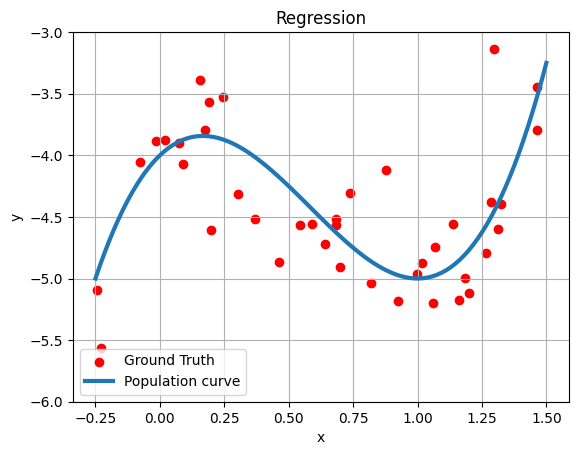

In [1224]:
# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the polynomial
ax.set(xlabel='x', ylabel='y', title='Regression')
ax.scatter(x_gt, y_gt, label='Ground Truth', c='r')
ax.plot(x, y_population, label='Population curve', lw=3)
ax.set_ylim([-6, -3])

ax.legend()
ax.grid(True)

# Show the plot
plt.show()

## Create Train and Test data sets

In [1225]:
from sklearn.model_selection import train_test_split

Converting x which is an 1d vector to a 2d array. Sklearn assumes that the feature array is 2d. Documentation too uses 'X' and not 'x'.

In [1226]:
x_gt = x_gt_1d[:, np.newaxis]

In [1227]:
x_train, x_test, y_train, y_test = train_test_split(x_gt, y_gt, train_size = 0.7, random_state=42)

In [1228]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28, 1), (12, 1), (28,), (12,))

## Generate Polynomial Features

In [1229]:
from sklearn.preprocessing import PolynomialFeatures

In [1230]:
polynomial_feature_pipeline = PolynomialFeatures((1,15), include_bias=False)

## Load Common Libraries used later

In [1231]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

## Polynomial Regression

In [1232]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [1233]:
regression_dictionary = {'Vanilla Regression': LinearRegression(),
                         'Ridge Regression': Ridge(alpha=1e-4, max_iter=10000),
                         'Lasso Regression': Lasso(alpha=1e-2, max_iter=1000000, tol=1e-3),
}

In [1234]:
regression_type = 'Vanilla Regression'

In [1235]:
polynomial_regression = make_pipeline(
    polynomial_feature_pipeline,
    regression_dictionary[regression_type]
    )

In [1236]:
polynomial_regression.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=(1, 15), include_bias=False)),
                ('linearregression', LinearRegression())])

In [1237]:
pr = polynomial_regression[-1]
pr.n_features_in_, pr.intercept_.round(2), pr.coef_.round(2),

(15,
 -3.95,
 array([-8.78000000e+00,  1.42400000e+02,  1.27067000e+03, -2.15853000e+04,
         8.84191800e+04, -1.14427600e+04, -1.12822502e+06,  4.70241419e+06,
        -1.03470723e+07,  1.44770176e+07, -1.35137310e+07,  8.41696543e+06,
        -3.36705509e+06,  7.83622670e+05, -8.07328900e+04]))

In [1238]:
fit_coefficients = np.hstack([np.flip(pr.coef_), pr.intercept_])
fit_coefficients

array([-8.07328908e+04,  7.83622668e+05, -3.36705509e+06,  8.41696543e+06,
       -1.35137310e+07,  1.44770176e+07, -1.03470723e+07,  4.70241419e+06,
       -1.12822502e+06, -1.14427560e+04,  8.84191778e+04, -2.15853049e+04,
        1.27067086e+03,  1.42402761e+02, -8.78411075e+00, -3.95432122e+00])

In [1239]:
yfit = np.polyval(fit_coefficients, x)

In [1240]:
yhat_train = polynomial_regression.predict(x_train)
train_rmse = mean_squared_error(yhat_train, y_train, squared=False)

In [1241]:
yhat_test = polynomial_regression.predict(x_test)
test_rmse = mean_squared_error(yhat_test, y_test, squared=False)

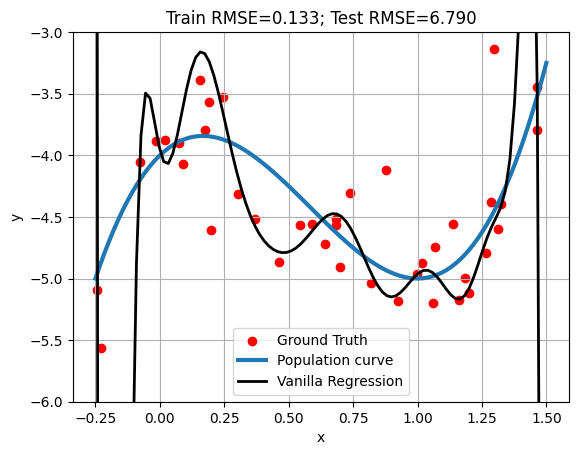

In [1242]:
# Create figure and axis objects
fig, ax = plt.subplots()

# Plot the polynomial
ax.set(xlabel='x', ylabel='y', title=f'Train RMSE={train_rmse:.3f}; Test RMSE={test_rmse:.3f}')
ax.scatter(x_gt, y_gt, label='Ground Truth', c='r')
ax.plot(x, y_population, label='Population curve', lw=3)
ax.plot(x, yfit, label=regression_type, lw=2, c='black')

ax.set_ylim([-6, -3])
ax.legend()
ax.grid(True)

# Show the plot
plt.show()